In [1]:
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

### Читаем датасет ###

In [2]:
x_df = pd.read_table('data/semeion.data', header=None, delimiter=r'\s+')
x_df.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


### Отделяем лейблы ###

In [3]:
y_df = x_df[x_df.columns[-10:]]
x_df = x_df.drop(columns=x_df.columns[-10:])
x_df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y_df.head()

,256,257,258,259,260,261,262,263,264,265
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


### Преобразовываем лейблы ###

In [5]:
y_df = pd.DataFrame(np.where(y_df != 0)[1])
y_df[256:261]

,0
256,2
257,2
258,2
259,3
260,3


### Разбиваем данные на обучающее и тестовое множества ###

In [6]:
X, Y = np.array(x_df), np.array(y_df).reshape(len(y_df),)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=17)

### Напишем функцию для отрисовки цифр ###

In [7]:
def drow_digit(indexes, Y_predicted=False):
    
    fig = plt.figure(figsize=(15, 15))
        
    for i, index in enumerate(indexes):
        if Y_predicted is not False:
            fig.add_subplot(1, 10, i + 1)
            plt.title(f'True: {Y_test[index]}\nAlgorithm: {Y_predicted[index]}')
            plt.imshow(X_test[index].reshape(16,16))
        else:
            fig.add_subplot(1, 10, i + 1)
            plt.title(f'True: {Y_train[index]}')
            plt.imshow(X_train[index].reshape(16,16))


### Посмотрим 10 случайных цифр из обучающего множества ###

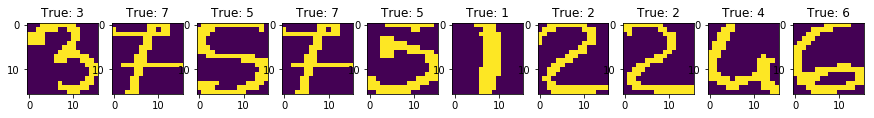

In [8]:
drow_digit(np.random.choice(np.arange(len(Y_train)), 10))

### Задаём модель, обучаем её и запускаем на тестовом множестве ###

In [9]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

### Пишем функцию для анализа предсказаний ###

Она выведет accuracy, precision, recall и F1 (Fbeta для beta == 1) для каждой цифры и для всего набора данных. Построит матрицу несоотвествия.

In [10]:
def analyze_preds(predictions):
    print('Accuracy score: ', accuracy_score(Y_test, predictions))
    print(classification_report(Y_test, predictions, digits=4))
    cm = confusion_matrix(Y_test, predictions)
    plt.figure(figsize = (8, 8))
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('True', fontsize=15)

#### *Запустим её для наших ответов* ####

Accuracy score:  0.896551724137931
              precision    recall  f1-score   support

           0     0.9744    1.0000    0.9870        38
           1     0.6579    0.9259    0.7692        27
           2     0.9062    0.9355    0.9206        31
           3     0.8438    1.0000    0.9153        27
           4     0.8889    0.8276    0.8571        29
           5     0.8974    0.9722    0.9333        36
           6     0.9355    0.9355    0.9355        31
           7     1.0000    0.8235    0.9032        34
           8     0.9286    0.7647    0.8387        34
           9     1.0000    0.7812    0.8772        32

   micro avg     0.8966    0.8966    0.8966       319
   macro avg     0.9033    0.8966    0.8937       319
weighted avg     0.9101    0.8966    0.8974       319



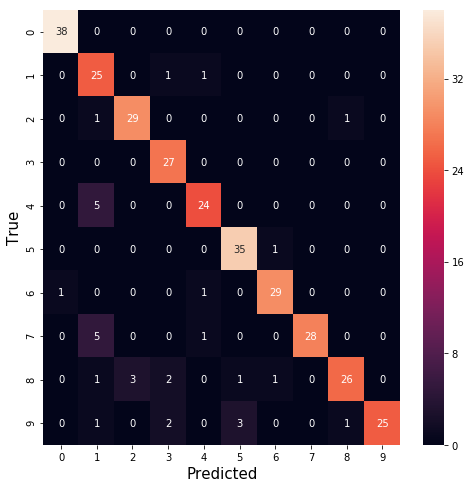

In [11]:
analyze_preds(predictions)

#### *Результат неплохой, посмотрим, на каких цифрах появляются ошибки* ####
Рассмотрим 10 случайных цифр из тестового множества.

[7, 10, 28, 42, 44, 58, 77, 86, 100, 120, 153, 157, 182, 183, 184, 185, 187, 200, 212, 217, 229, 243, 261, 262, 270, 280, 286, 290, 294, 297, 312, 314, 317]


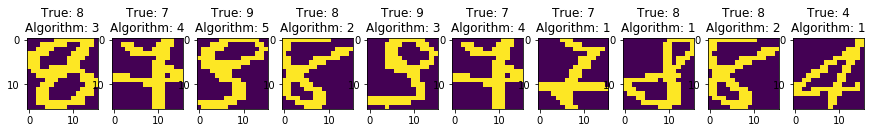

In [12]:
incorrects = list(np.where(predictions != Y_test)[0])
print(incorrects)
drow_digit(np.random.choice(incorrects, 10), predictions)

### Алгоритм работает достаточно неплохо, попробуем поднять точность, подобрав параметры ###

In [13]:
params = {'n_neighbors': np.arange(1, 11), 'weights':['uniform','distance'], 
          'algorithm': ['ball_tree', 'kd_tree', 'brute']}

grid = GridSearchCV(model, params, n_jobs=-1, cv=5)

start_time = time.monotonic()
grid.fit(X_train, Y_train)
print(f'Для поиска лучших параметров потребовалось {time.monotonic() - start_time} секунд')

grid.best_params_

Для поиска лучших параметров потребовалось 79.54700000002049 секунд


{'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'distance'}

### Запустим алгоритм с лучшими параметрами и посмотрим на точность на тестовом множестве ###

Accuracy score:  0.9122257053291536
              precision    recall  f1-score   support

           0     0.9744    1.0000    0.9870        38
           1     0.7353    0.9259    0.8197        27
           2     0.9667    0.9355    0.9508        31
           3     0.8667    0.9630    0.9123        27
           4     0.9231    0.8276    0.8727        29
           5     0.8974    0.9722    0.9333        36
           6     0.9375    0.9677    0.9524        31
           7     1.0000    0.9118    0.9538        34
           8     0.8966    0.7647    0.8254        34
           9     0.9310    0.8438    0.8852        32

   micro avg     0.9122    0.9122    0.9122       319
   macro avg     0.9129    0.9112    0.9093       319
weighted avg     0.9174    0.9122    0.9122       319



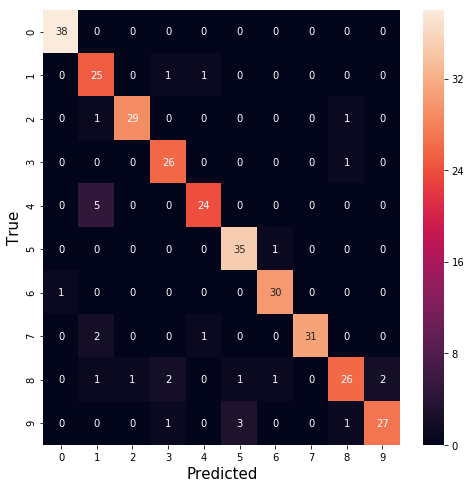

In [14]:
predictions = grid.predict(X_test)
analyze_preds(predictions)

*Качество работы алгоритма возросло на полторы сотых*

#### *Качество работы алгоритма возросло на полторы сотых. Посмотрим на каких цифрах появляются ошибки* ####
Рассмотрим 10 случайных цифр из тестового множества.

[7, 10, 28, 42, 44, 58, 77, 86, 100, 108, 131, 153, 157, 184, 185, 187, 200, 217, 229, 243, 261, 270, 286, 290, 297, 312, 314, 317]


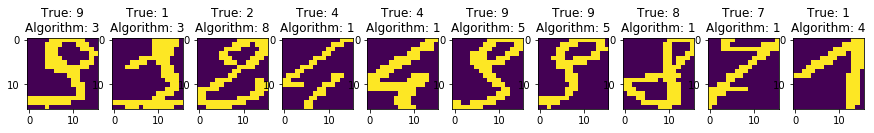

In [15]:
incorrects = list(np.where(predictions != Y_test)[0])
print(incorrects)
drow_digit(np.random.choice(incorrects, 10), predictions)

#### *Посмотрим, какие классифицировались верно* ####
Так же рассмотрим 10 случайных цифр из тестового множества.

[7, 10, 28, 42, 44, 58, 77, 86, 100, 108, 131, 153, 157, 184, 185, 187, 200, 217, 229, 243, 261, 270, 286, 290, 297, 312, 314, 317]


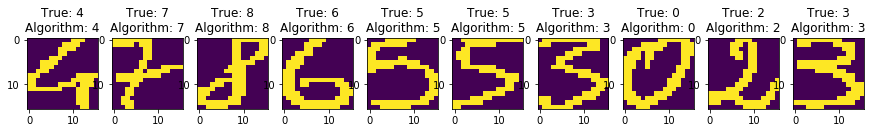

In [16]:
corrects = list(np.where(predictions == Y_test)[0])
print(incorrects)
drow_digit(np.random.choice(corrects, 10), predictions)